# California House Price Estimation

A model that estimate housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. This model learning from this dataset and be able to predict the median housing price in any district, given all the other metrics.

**Reference Book:** [Hands on Machine Learning](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) with Scikit-Learn, Keras, and TensorFlow, 2nd Edition

In [29]:
# IMPORT LIBRARYES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.impute import SimpleImputer
import os
import sys

# LOAD DATA FROM A CSV FILE
# PARAMETER: csv filename
# RETURN: an pandas object loaded csv file
def load_data(file_name):
    training_data = os.path.join(os.getcwd(), "datasets", file_name)
    try:
        return pd.read_csv(training_data)
    except FileNotFoundError:
        sys.stderr.write("[-] error: datasets/"+file_name+" doesn't found.")
    return None

# LOAD DATA FROM CSV FILE
training_dataset = load_data("housing.csv")

## Data Information

In [59]:
# PRINTING 1ST 5 ROWS
training_dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
# PRINTING DATA INFORMATIONS
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are `20,640` instances in the dataset and among that `total_bedrooms` attribute has only `20,433` non-null values, meaning that `207` districts are missing this feature.

In [32]:
# PRINTING A PARTICULAR DATASETS VALUE COUNT
training_dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [33]:
# PRINTING SUMMERY OF THE DATASET
training_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


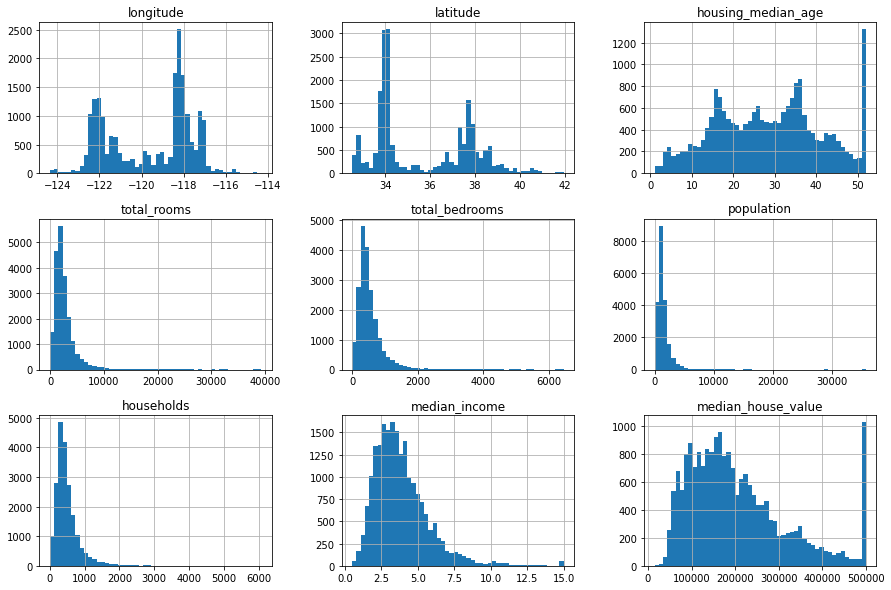

In [34]:
# PLOTING HISTOGRAM
training_dataset.hist(bins=50, figsize=(15,10))
plt.show()

## Discover and Visualize the Data to Gain Insights

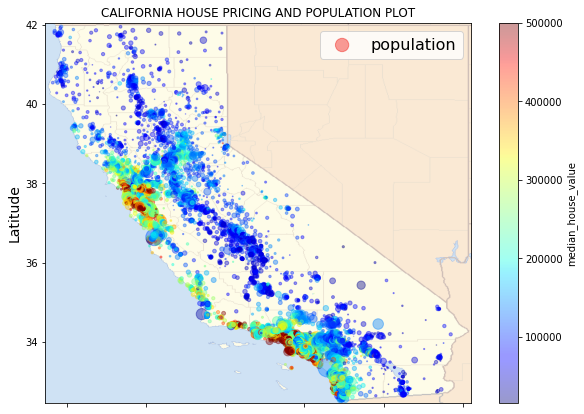

In [35]:
# GETTING CALIFORNIA MAP
california_map = mpimg.imread("images/california_map.png")

# PLOT POPULATION AND MEDIAN HOUSE PRICING SCATTER PLOT ON THE MAP
training_dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                      s=training_dataset["population"]/100, label="population",
                      figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.title("CALIFORNIA HOUSE PRICING AND POPULATION PLOT")
plt.show()

## Calculating Correlation Coefficients

The correlation coefficient ranges from `–1` to `1`. When it is close to `1`, it means that there is a strong positive correlation. When the coefficient is close to `–1`, it means that there is a strong negative correlation and, coefficients close to `zero` mean that there is no linear correlation.

In [36]:
correlation = training_dataset.corr()
# CALCULATING CO RELATION CO EFFICIENT BETWEEN median_house_pricing WITH ALL ATTRIBUTES
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Data Cleaning

The training dataset can contains non-numeric values. So, 1st of all we need to handle the non-numeric values (eigther by removing the column or by replacing with some appropriate numeric data). The dataset can contains some `N/A` attributes. We need to complete the incomplete attributes by replacing with the median value.

In [53]:
# INCOMPLETE ROWS
incomplete_rows = training_dataset[training_dataset.isnull().any(axis=1)].head()
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [54]:
# FILLING INCOMPLETE ROWS WITH MEDIAN VALUE
median = training_dataset["total_bedrooms"].median()
incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [49]:
# CREATE A COPY OF THE ACTUAL DATASET WITH NON NOMINAL ATTRIBUTES
dataset = training_dataset.drop("ocean_proximity", axis=1)

In [58]:
# FILL THE MISSING VALUES USING THE MEDIAN VALUE
imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)
X = imputer.transform(dataset)